In [1]:
# ✅ 한글 폰트 설치 (NanumGothic)
!apt-get update -qq
!apt-get install -y fonts-nanum

# ✅ matplotlib 폰트 캐시 삭제
import os
os.system('rm -rf ~/.cache/matplotlib')

print("✅ 폰트 설치 완료! 이제 런타임 > 다시 시작(ctrl+M+.) 을 꼭 해주세요.")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (45.7 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126308 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
✅ 폰트 설치 완료! 이제 런타임 > 다시 시작(ctrl+M+

In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'NanumGothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원 축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 학습 모델 저장을 위한 라이브러리
import pickle

In [2]:
train_temp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/전처리완료_데이터/chargeInfo_train.csv')
test_temp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/전처리완료_데이터/chargeInfo_test.csv')


# 각 칼럼의 데이터의 타입을 확인한다.
for idx, val in train_temp.dtypes.items() :
    print(f'{idx}의 타입 : {val}')

train_df = train_temp.copy()
test_df = test_temp.copy()

기준년월의 타입 : int64
ID의 타입 : object
청구서수령방법의 타입 : object
청구금액_B0의 타입 : int64
청구금액_R3M의 타입 : int64
청구금액_R6M의 타입 : int64
포인트_마일리지_건별_B0M의 타입 : int64
포인트_마일리지_건별_R3M의 타입 : int64
포인트_포인트_건별_B0M의 타입 : int64
포인트_포인트_건별_R3M의 타입 : int64
포인트_마일리지_월적립_B0M의 타입 : int64
포인트_마일리지_월적립_R3M의 타입 : int64
포인트_포인트_월적립_B0M의 타입 : int64
포인트_포인트_월적립_R3M의 타입 : int64
포인트_적립포인트_R12M의 타입 : int64
포인트_적립포인트_R3M의 타입 : int64
포인트_이용포인트_R12M의 타입 : int64
포인트_이용포인트_R3M의 타입 : int64
포인트_잔여포인트_B0M의 타입 : int64
마일_적립포인트_R12M의 타입 : int64
마일_적립포인트_R3M의 타입 : int64
마일_이용포인트_R12M의 타입 : int64
마일_이용포인트_R3M의 타입 : int64
마일_잔여포인트_B0M의 타입 : int64
할인건수_R3M의 타입 : int64
할인금액_R3M의 타입 : int64
할인건수_B0M의 타입 : int64
할인금액_B0M의 타입 : int64
할인금액_청구서_R3M의 타입 : int64
할인금액_청구서_B0M의 타입 : int64
상환개월수_결제일_R6M의 타입 : int64
상환개월수_결제일_R3M의 타입 : int64
선결제건수_R6M의 타입 : int64
선결제건수_R3M의 타입 : int64
연체건수_R6M의 타입 : int64
연체건수_R3M의 타입 : int64
혜택수혜금액_R3M의 타입 : int64
포인트_마일리지_환산_B0M의 타입 : int64
혜택수혜금액의 타입 : int64
Segment의 타입 : object


In [9]:
df_corr = train_df.drop(columns=[['ID']], errors='ignore')

df_corr['Segment'] = df_corr['Segment'].factorize()[0]

df_corr_num = df_corr.select_dtypes(include=['number'])

a1 = df_corr_num.corr()['Segment'].drop('Segment')  # 자기자신 제외
a2 = abs(a1).sort_values(ascending=False)

print(a2.to_string(float_format="{:.6f}".format))

할인건수_R3M           0.100593
할인금액_청구서_R3M       0.072161
할인금액_청구서_B0M       0.071597
할인금액_R3M           0.069050
할인금액_B0M           0.067288
상환개월수_결제일_R6M      0.066124
상환개월수_결제일_R3M      0.059333
포인트_적립포인트_R3M      0.055809
포인트_이용포인트_R3M      0.050428
선결제건수_R6M          0.046925
포인트_적립포인트_R12M     0.046047
선결제건수_R3M          0.044220
혜택수혜금액             0.043691
포인트_이용포인트_R12M     0.043145
포인트_마일리지_환산_B0M    0.042431
포인트_포인트_건별_R3M     0.037671
포인트_포인트_월적립_R3M    0.037519
포인트_포인트_건별_B0M     0.037366
혜택수혜금액_R3M         0.035787
마일_적립포인트_R3M       0.035633
포인트_포인트_월적립_B0M    0.031717
연체건수_R6M           0.027815
포인트_마일리지_월적립_R3M   0.027181
할인건수_B0M           0.025759
연체건수_R3M           0.025320
마일_잔여포인트_B0M       0.024818
포인트_마일리지_월적립_B0M   0.024813
포인트_마일리지_건별_R3M    0.021914
마일_적립포인트_R12M      0.020706
마일_이용포인트_R3M       0.020640
포인트_마일리지_건별_B0M    0.020554
마일_이용포인트_R12M      0.019695
청구금액_B0            0.004966
청구금액_R3M           0.003395
청구금액_R6M           0.001225
포인트_잔여포인트_B0M      0

In [10]:
train_df.columns

Index(['기준년월', 'ID', '청구서수령방법', '청구금액_B0', '청구금액_R3M', '청구금액_R6M',
       '포인트_마일리지_건별_B0M', '포인트_마일리지_건별_R3M', '포인트_포인트_건별_B0M',
       '포인트_포인트_건별_R3M', '포인트_마일리지_월적립_B0M', '포인트_마일리지_월적립_R3M',
       '포인트_포인트_월적립_B0M', '포인트_포인트_월적립_R3M', '포인트_적립포인트_R12M', '포인트_적립포인트_R3M',
       '포인트_이용포인트_R12M', '포인트_이용포인트_R3M', '포인트_잔여포인트_B0M', '마일_적립포인트_R12M',
       '마일_적립포인트_R3M', '마일_이용포인트_R12M', '마일_이용포인트_R3M', '마일_잔여포인트_B0M',
       '할인건수_R3M', '할인금액_R3M', '할인건수_B0M', '할인금액_B0M', '할인금액_청구서_R3M',
       '할인금액_청구서_B0M', '상환개월수_결제일_R6M', '상환개월수_결제일_R3M', '선결제건수_R6M',
       '선결제건수_R3M', '연체건수_R6M', '연체건수_R3M', '혜택수혜금액_R3M', '포인트_마일리지_환산_B0M',
       '혜택수혜금액', 'Segment'],
      dtype='object')

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 14 Column
features = ['청구금액_R3M', '포인트_포인트_건별_R3M',
            '포인트_마일리지_월적립_R3M','포인트_포인트_월적립_R3M', '포인트_적립포인트_R3M',
            '포인트_이용포인트_R3M', '마일_적립포인트_R3M', '마일_이용포인트_R3M', '할인건수_R3M', '할인금액_R3M',
            '할인금액_청구서_R3M', '상환개월수_결제일_R3M', '선결제건수_R3M', '혜택수혜금액_R3M']

# X 데이터셋 생성
X = df_corr[features].copy()
X = add_constant(X)  # VIF 계산에 상수항 포함

# VIF 계산
vif_df = pd.DataFrame()
vif_df["Feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# VIF 결과 정렬 출력
vif_df.sort_values(by="VIF", ascending=False)


,Feature,VIF
7,마일_적립포인트_R3M,22.310058
8,마일_이용포인트_R3M,17.615505
5,포인트_적립포인트_R3M,9.522240
10,할인금액_R3M,7.202245
6,포인트_이용포인트_R3M,6.884384
14,혜택수혜금액_R3M,6.122898
3,포인트_마일리지_월적립_R3M,5.157052
11,할인금액_청구서_R3M,4.113516
0,const,4.007300
2,포인트_포인트_건별_R3M,2.946286


In [12]:
# 항상 유지할 컬럼 추가
train_essential_cols = ['기준년월', 'ID', 'Segment']
test_essential_cols = ['기준년월', 'ID']

# 최종 유지할 컬럼 리스트
trian_final_keep_cols = train_essential_cols + features
test_final_keep_cols = test_essential_cols + features

# 나머지 컬럼 제거
train_df = train_df[trian_final_keep_cols]
test_df = test_df[test_final_keep_cols]
display(train_df)
display(test_df)

,기준년월,ID,Segment,청구금액_R3M,포인트_포인트_건별_R3M,포인트_마일리지_월적립_R3M,포인트_포인트_월적립_R3M,포인트_적립포인트_R3M,포인트_이용포인트_R3M,마일_적립포인트_R3M,마일_이용포인트_R3M,할인건수_R3M,할인금액_R3M,할인금액_청구서_R3M,상환개월수_결제일_R3M,선결제건수_R3M,혜택수혜금액_R3M
0,201807,TRAIN_000000,D,46588,1827,0,0,1827,1296,0,0,0,0,0,3,0,3
1,201807,TRAIN_000001,E,10530,0,0,0,0,0,0,0,0,0,304,3,0,0
2,201807,TRAIN_000002,C,85931,5153,0,0,5153,2765,0,0,0,0,0,3,0,121
3,201807,TRAIN_000003,D,61518,2523,0,0,2523,2467,0,0,0,0,0,3,0,3
4,201807,TRAIN_000004,E,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,E,0,0,0,0,0,2049,0,0,0,0,0,0,0,0
2399996,201812,TRAIN_399996,D,37515,10890,0,0,8478,13202,0,0,0,0,162,3,0,164
2399997,201812,TRAIN_399997,C,22274,0,0,0,0,0,0,0,0,0,0,3,0,0
2399998,201812,TRAIN_399998,E,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,기준년월,ID,청구금액_R3M,포인트_포인트_건별_R3M,포인트_마일리지_월적립_R3M,포인트_포인트_월적립_R3M,포인트_적립포인트_R3M,포인트_이용포인트_R3M,마일_적립포인트_R3M,마일_이용포인트_R3M,할인건수_R3M,할인금액_R3M,할인금액_청구서_R3M,상환개월수_결제일_R3M,선결제건수_R3M,혜택수혜금액_R3M
0,201807,TEST_00000,11441,0,0,0,0,0,2532,2604,0,0,0,2,0,143
1,201807,TEST_00001,20522,0,0,0,0,0,0,0,0,0,15,3,0,0
2,201807,TEST_00002,50508,0,0,6032,6032,5945,0,0,0,149,150,3,0,148
3,201807,TEST_00003,4604,1319,0,0,1319,1059,0,0,0,0,0,1,0,3
4,201807,TEST_00004,6788,0,0,0,0,0,0,0,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,201812,TEST_99995,0,0,0,0,0,0,0,0,0,0,0,0,0,0
599996,201812,TEST_99996,1256,0,0,0,0,0,0,0,0,150,150,3,2,149
599997,201812,TEST_99997,0,0,0,0,0,0,0,0,0,0,0,0,0,0
599998,201812,TEST_99998,48141,0,0,0,0,3804,0,0,0,0,242,1,3,0


In [13]:
train_df.to_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/피처선택완료_데이터/chargeInfo_train.csv', index=False, encoding='utf-8-sig')
test_df.to_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/피처선택완료_데이터/chargeInfo_test.csv', index=False, encoding='utf-8-sig')

In [14]:
train_temp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/피처선택완료_데이터/chargeInfo_train.csv')
test_temp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/피처선택완료_데이터/chargeInfo_test.csv')

display(train_temp)
display(test_temp)

,기준년월,ID,Segment,청구금액_R3M,포인트_포인트_건별_R3M,포인트_마일리지_월적립_R3M,포인트_포인트_월적립_R3M,포인트_적립포인트_R3M,포인트_이용포인트_R3M,마일_적립포인트_R3M,마일_이용포인트_R3M,할인건수_R3M,할인금액_R3M,할인금액_청구서_R3M,상환개월수_결제일_R3M,선결제건수_R3M,혜택수혜금액_R3M
0,201807,TRAIN_000000,D,46588,1827,0,0,1827,1296,0,0,0,0,0,3,0,3
1,201807,TRAIN_000001,E,10530,0,0,0,0,0,0,0,0,0,304,3,0,0
2,201807,TRAIN_000002,C,85931,5153,0,0,5153,2765,0,0,0,0,0,3,0,121
3,201807,TRAIN_000003,D,61518,2523,0,0,2523,2467,0,0,0,0,0,3,0,3
4,201807,TRAIN_000004,E,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,E,0,0,0,0,0,2049,0,0,0,0,0,0,0,0
2399996,201812,TRAIN_399996,D,37515,10890,0,0,8478,13202,0,0,0,0,162,3,0,164
2399997,201812,TRAIN_399997,C,22274,0,0,0,0,0,0,0,0,0,0,3,0,0
2399998,201812,TRAIN_399998,E,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,기준년월,ID,청구금액_R3M,포인트_포인트_건별_R3M,포인트_마일리지_월적립_R3M,포인트_포인트_월적립_R3M,포인트_적립포인트_R3M,포인트_이용포인트_R3M,마일_적립포인트_R3M,마일_이용포인트_R3M,할인건수_R3M,할인금액_R3M,할인금액_청구서_R3M,상환개월수_결제일_R3M,선결제건수_R3M,혜택수혜금액_R3M
0,201807,TEST_00000,11441,0,0,0,0,0,2532,2604,0,0,0,2,0,143
1,201807,TEST_00001,20522,0,0,0,0,0,0,0,0,0,15,3,0,0
2,201807,TEST_00002,50508,0,0,6032,6032,5945,0,0,0,149,150,3,0,148
3,201807,TEST_00003,4604,1319,0,0,1319,1059,0,0,0,0,0,1,0,3
4,201807,TEST_00004,6788,0,0,0,0,0,0,0,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,201812,TEST_99995,0,0,0,0,0,0,0,0,0,0,0,0,0,0
599996,201812,TEST_99996,1256,0,0,0,0,0,0,0,0,150,150,3,2,149
599997,201812,TEST_99997,0,0,0,0,0,0,0,0,0,0,0,0,0,0
599998,201812,TEST_99998,48141,0,0,0,0,3804,0,0,0,0,242,1,3,0


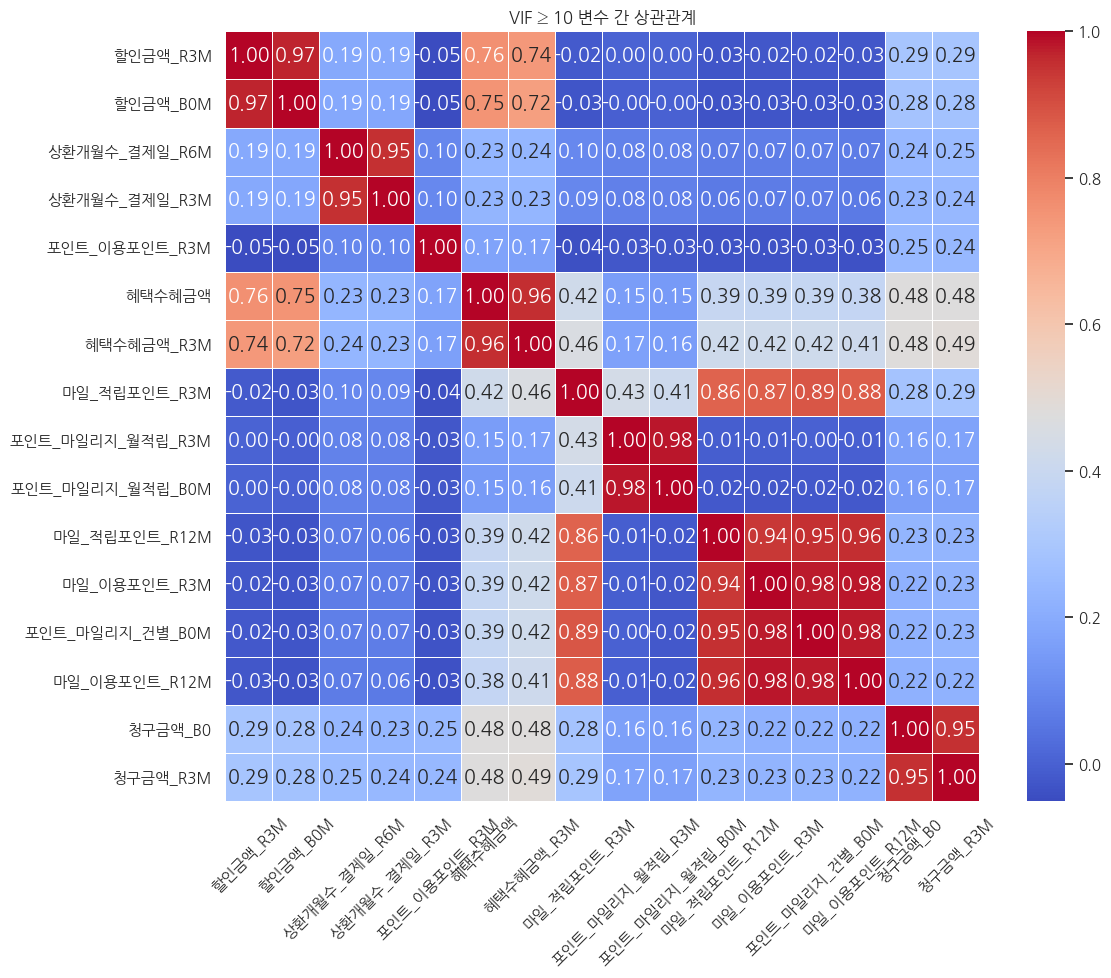

In [ ]:
# Step 1. VIF 10 이상인 변수만 추출
high_vif_cols = vif_df[vif_df['VIF'] >= 10]['Feature'].tolist()

# Step 2. 해당 컬럼만 원본 데이터에서 추출
high_vif_data = train_df[high_vif_cols]

# Step 3. 상관계수 행렬 계산
corr_matrix = high_vif_data.corr()

# Step 4. 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("VIF ≥ 10 변수 간 상관관계")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
def get_high_corr_pairs(df, threshold=0.9):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    pairs = [(col, row) for col in upper.columns for row in upper.index if upper.loc[row, col] > threshold]
    return pairs


get_high_corr_pairs(corr_matrix)

[('할인금액_B0M', '할인금액_R3M'),
 ('상환개월수_결제일_R3M', '상환개월수_결제일_R6M'),
 ('혜택수혜금액_R3M', '혜택수혜금액'),
 ('포인트_마일리지_월적립_B0M', '포인트_마일리지_월적립_R3M'),
 ('마일_적립포인트_R12M', '마일_적립포인트_R3M'),
 ('마일_이용포인트_R3M', '마일_적립포인트_R3M'),
 ('마일_이용포인트_R3M', '마일_적립포인트_R12M'),
 ('포인트_마일리지_건별_B0M', '마일_적립포인트_R3M'),
 ('포인트_마일리지_건별_B0M', '마일_적립포인트_R12M'),
 ('포인트_마일리지_건별_B0M', '마일_이용포인트_R3M'),
 ('마일_이용포인트_R12M', '마일_적립포인트_R3M'),
 ('마일_이용포인트_R12M', '마일_적립포인트_R12M'),
 ('마일_이용포인트_R12M', '마일_이용포인트_R3M'),
 ('마일_이용포인트_R12M', '포인트_마일리지_건별_B0M'),
 ('청구금액_R3M', '청구금액_B0')]